This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

In [1]:
# Libraries Dependecies
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import pyplot as plt

Calling dataset directly from kaggle. [Kaggle Data](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

In [2]:
# installing kaggle in this colab
! pip install -q kaggle

In [3]:
# uplaoding genrated token from the kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamsoni07","key":"7459209826438ab2f84eb807f093e98d"}'}

In [4]:
# making directory
#Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
#Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 # list of project files
 #That's all ! You can check if everything's okay by running this command
#  ! kaggle datasets list

In [7]:
! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 67.3MB/s]


In [8]:
# unzipping this zip file
! unzip /content/vehicle-dataset-from-cardekho.zip

Archive:  /content/vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            


In [9]:
# loading this dataset into pandas DataFrame
car_data = pd.read_csv('/content/car data.csv')

In [10]:
# Frist five rows of the dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# shape of the dataset
car_data.shape

(301, 9)

This car data has 9 columns and 301 rows(data samples).

In [12]:
# getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


The above car price dataset doesn't have any missing value, which is good things. If we want to find number of missing values, then we have to use following command.

In [13]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
# columns 6,7 and 8 (Fuel_Type, seller_Type, and Transmission) have not number value and machine is very comfort with this number instead srtings
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [15]:
car_data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [16]:
car_data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

1. Fuel_Type has 3 categories.
2. Seller_Type has 2 categories.
3. Transmission has also 2 categories.

Now lets replace these catergories with numbers.






In [17]:
# encoding with numbers
car_data.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG': 2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}}, inplace =True)

In [18]:
# now let's see the dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


From the above dataset the values have been replaced with numbers. 

In [19]:
# Now labelling data into X and Y and here 1st column has names of car, which doesn't have any use to make pediction, so disregrad this
X = car_data.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_data.Selling_Price

In [20]:
# now cheching the shape of features
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [21]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [22]:
# now spliting data into train and test 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 1)

In [23]:
# checking the shape of feautes
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


Now let's train our traing data with **Linear Regression**.




In [24]:
lin_reg = LinearRegression()

In [25]:
# fitting the train data
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [26]:
#  model Evalution on training data
X_train_prediction = lin_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.8747087509719506


Text(0.5, 1.0, 'Predicted vs Actual values')

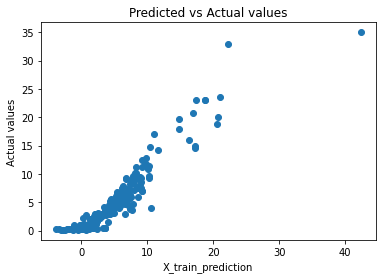

In [27]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [28]:
#  model Evalution on test data
X_test_prediction = lin_reg.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.6209908213647468


Text(0.5, 1.0, 'Predicted vs Actual values')

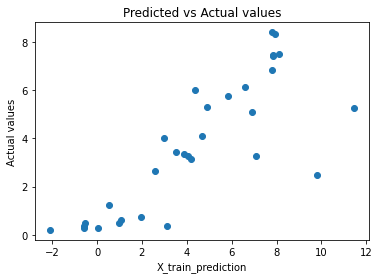

In [29]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [30]:
# saving this model weight of LR
import joblib 
joblib.dump(lin_reg,'car_price_prediction_linear_regression.sav')

['car_price_prediction_linear_regression.sav']

#**We can train this model with different type of other algorithms.**
1. Lasso
2. XGBoost Regessor
3. Support Vector Machine (svm) Regression (SVR)

## **1. Regression with Lasso**

In [31]:
# training with lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train,Y_train)

Lasso()

In [32]:
#  model Evalution on training data
X_train_prediction = lasso_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.8152910337698503


Text(0.5, 1.0, 'Predicted vs Actual values')

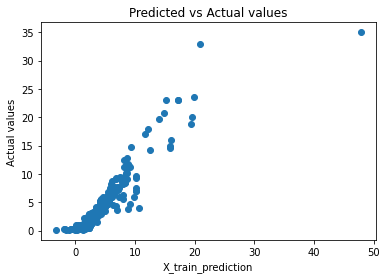

In [33]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [34]:
#  model Evalution on test data
X_test_prediction = lin_reg.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.6209908213647468


Text(0.5, 1.0, 'Predicted vs Actual values')

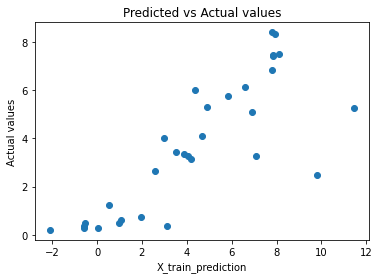

In [35]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [36]:
# saving this model weight of LR
import joblib 
joblib.dump(lasso_reg,'car_price_prediction_lasso.sav')

['car_price_prediction_lasso.sav']

# 2. **XGBRessor**

In [37]:
# traing this data with XGBRessor
from xgboost import XGBRegressor
xg_regressor = XGBRegressor()
xg_regressor.fit(X_train,Y_train)

[07:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [38]:
#  model Evalution on training data
X_train_prediction = xg_regressor.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.9938508306916929


Text(0.5, 1.0, 'Predicted vs Actual values')

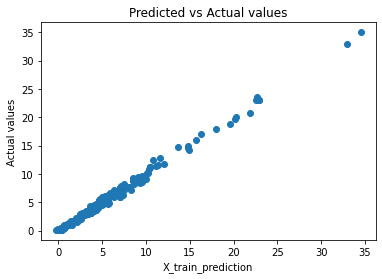

In [39]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [40]:
#  model Evalution on test data
X_test_prediction = xg_regressor.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.8668007111733818


Text(0.5, 1.0, 'Predicted vs Actual values')

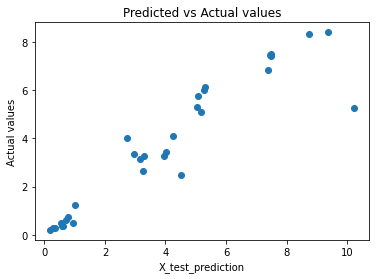

In [41]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_test_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [42]:
# saving this model weight of LR
import joblib 
joblib.dump(lasso_reg,'car_price_prediction_xgb_regressor.sav')

['car_price_prediction_xgb_regressor.sav']

#3. **Support Vector Regressor**

In [43]:
# support vector regression
from sklearn import svm
svm_reg = svm.SVR()

In [44]:
svm_reg.fit(X_train,Y_train)

SVR()

In [45]:
#  model Evalution on training data
X_train_prediction = svm_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : -22.31844275479255


Text(0.5, 1.0, 'Predicted vs Actual values')

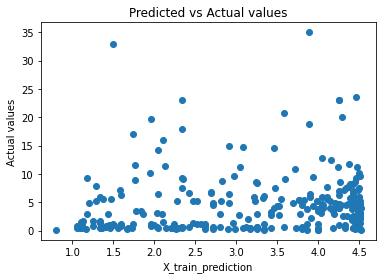

In [46]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [47]:
#  model Evalution on test data
X_test_prediction = svm_reg.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : -6.752743183426136


Text(0.5, 1.0, 'Predicted vs Actual values')

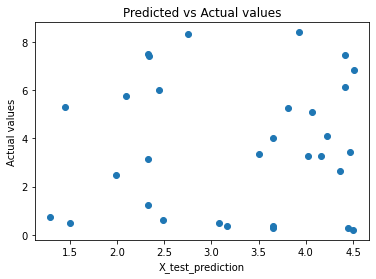

In [48]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_test_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

From the regressor models we can see, XGBRegressor is making good prediction among other algorithms, and SVRegression gives us worst prediction.

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
# fitting the values
rand_reg = RandomForestRegressor()
rand_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
# model evaulation on train data set
#  model Evalution on training data
X_train_prediction = rand_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.9827904953053547


Text(0.5, 1.0, 'Predicted vs Actual values')

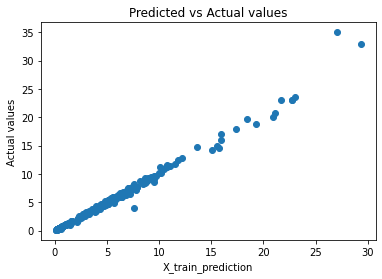

In [52]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [53]:
#  model Evalution on test data
X_test_prediction = rand_reg.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.6965611996937489


Text(0.5, 1.0, 'Predicted vs Actual values')

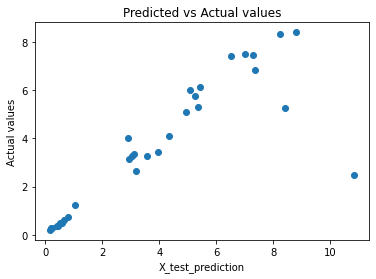

In [54]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_test_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')